## Make two cluster then draw rectangles(red & green) using coordinates(x,y,w,h)

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### step 1: Extract 60 frames from a video

In [15]:
'''
def extract_frames(video_path, output_folder, num_frames=70):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate the interval between frames to extract
    frame_interval = max(total_frames // num_frames, 1)
    
    count = 0
    extracted_frames = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Extract frame based on the calculated interval
        if count % frame_interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{extracted_frames + 1}.jpg")
            cv2.imwrite(frame_filename, frame)
            extracted_frames += 1
        
        count += 1
        
        # Stop if we have extracted the desired number of frames
        if extracted_frames >= num_frames:
            break
    
    cap.release()
    print(f"Extracted {extracted_frames} frames to '{output_folder}'.")

video_path =r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\videos\a.mp4'  # Change this to your video file path
output_folder = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\70_images'
extract_frames(video_path, output_folder)

'''

Extracted 70 frames to 'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\70_images'.


#### step 2: Resize images (large to small size

In [16]:
'''
def resize_images_in_folder(source_dir, target_dir):
    # Loop through subfolders
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                # Create the target subfolder if it doesn't exist
                target_subfolder = os.path.join(target_dir, os.path.relpath(root, source_dir))
                os.makedirs(target_subfolder, exist_ok=True)

                # Open the image file
                source_path = os.path.join(root,file)
                #image = cv2.imread(source_path)
                image = Image.open(source_path)
                # Check if the image is loaded successfully
                if image is None:
                    print(f"Error: Unable to load the image from {source_path}")
                    continue
                
                # Normalize the image
                resized_image =image.resize((new_width, new_height))
                #print(resized_image) 
                # Save the resized image to the target subfolder
                target_path = os.path.join(target_subfolder,file)
               
                #cv2.imwrite(target_path,resized_image)  
                resized_image.save(target_path)

                #print(f"Resized and saved: {target_path}")

source_dir = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\70_images'
target_dir = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\resize_images_70'
new_width = 370
new_height = 280

resize_images_in_folder(source_dir,target_dir)

'''

### step 3: Convert images to BMP format

In [17]:
'''
def convert_to_bmp(source_folder, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            img_path = os.path.join(source_folder, filename)
            
            # Read the image
            img = cv2.imread(img_path)
            
            # Remove the extension from the filename
            file_root = os.path.splitext(filename)[0]
            
            # Save image as BMP in the destination folder
            bmp_path = os.path.join(destination_folder, f"{file_root}.bmp")
            cv2.imwrite(bmp_path, img)
            print(f"Converted and saved: {bmp_path}")

source_folder =  r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\resize_images_70'
destination_folder = r"C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata"
convert_to_bmp(source_folder, destination_folder)

'''

Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_1.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_10.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_11.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_12.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_13.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_14.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_15.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_16.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\rawdata\frame_17.bmp
Converted and saved: C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2

#### step 4: Read the data from info.txt file

In [2]:
file_path = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive\info_70_kmeans.txt'
#file_path = r'C:\Users\zain\Desktop\k_meansFile2\new_kmeans3_info.txt'
data = pd.read_csv(file_path,header=None, delimiter=' ')  # Change delimiter if needed (e.g., ',', ' ')

data.columns = ['Frame_name', 'total_image', 'x_cordinate', 'y_cordinate', 'Width', 'Height']
df = pd.DataFrame(data)

# Display the DataFrame
#print(df)

df = df.drop(columns='total_image')
print(df)

              Frame_name  x_cordinate  y_cordinate  Width  Height
0    rawdata/frame_1.bmp          150          169     88      53
1   rawdata/frame_10.bmp          171           21     64      28
2   rawdata/frame_11.bmp           64          130     18      34
3   rawdata/frame_12.bmp          133          212     16      44
4   rawdata/frame_13.bmp           60          115     17      34
5   rawdata/frame_14.bmp          234           11     68      29
6   rawdata/frame_15.bmp          212           22     68      30
7   rawdata/frame_16.bmp          104           24     56      26
8   rawdata/frame_17.bmp          127          202     17      40
9   rawdata/frame_18.bmp           84           23     67      28
10  rawdata/frame_19.bmp          216            8     67      27
11   rawdata/frame_2.bmp          268           77     15      32
12  rawdata/frame_20.bmp          236           23     70      30
13  rawdata/frame_21.bmp          181           25     60      26
14  rawdat

#### step 5: Apply preprocessing---> remove/drop Frame_name ,x,y features

In [3]:
columns_to_drop = ['Frame_name','x_cordinate', 'y_cordinate']
df_dropped_by_name = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns by name
print("\nDataFrame after dropping specific columns by name:")
print(df_dropped_by_name)


DataFrame after dropping specific columns by name:
    Width  Height
0      88      53
1      64      28
2      18      34
3      16      44
4      17      34
5      68      29
6      68      30
7      56      26
8      17      40
9      67      28
10     67      27
11     15      32
12     70      30
13     60      26
14     16      43
15     58      44
16     58      29
17     68      28
18     82      48
19     68      43
20     61      29
21     79      48
22     20      34
23     15      23
24     14      23
25     18      24
26     12      33
27     11      34
28     65      30
29     20      33
30     17      37
31     12      30
32     17      34
33     21      32
34     83      49
35     36      30
36     19      34
37     75      47
38     34      33
39     14      34
40     63      31
41     76      45
42     70      46
43     17      41
44     14      33
45     73      43
46     18      34
47     18      30
48     16      34
49     77      43
50     20      35
51     17   

#### step 6: Calculate area then Apply K-means Clustering on Area

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Calculate Area
df_dropped_by_name['Area'] = df_dropped_by_name['Width'] / df_dropped_by_name['Height']

# Apply K-Means Clustering on  Area
kmeans_area = KMeans(n_clusters=2, random_state=42)
df_dropped_by_name['Area_Cluster'] = kmeans_area.fit_predict(df_dropped_by_name[['Area']])

# Display the DataFrame with area and cluster assignments
print("\nDataFrame with K-Means Clustering on Area:")
print(df_dropped_by_name[['Width', 'Height', 'Area', 'Area_Cluster']])


DataFrame with K-Means Clustering on Area:
    Width  Height      Area  Area_Cluster
0      88      53  1.660377             1
1      64      28  2.285714             1
2      18      34  0.529412             0
3      16      44  0.363636             0
4      17      34  0.500000             0
5      68      29  2.344828             1
6      68      30  2.266667             1
7      56      26  2.153846             1
8      17      40  0.425000             0
9      67      28  2.392857             1
10     67      27  2.481481             1
11     15      32  0.468750             0
12     70      30  2.333333             1
13     60      26  2.307692             1
14     16      43  0.372093             0
15     58      44  1.318182             1
16     58      29  2.000000             1
17     68      28  2.428571             1
18     82      48  1.708333             1
19     68      43  1.581395             1
20     61      29  2.103448             1
21     79      48  1.645833     

#### step 7: Combine all the features with area and area cluster

In [5]:
# Combine DataFrames horizontally
df_combined = pd.concat([df, df_dropped_by_name[['Area','Area_Cluster']] ], axis=1)

# Display the combined DataFrame
print("Combined DataFrame using concat:")
print(df_combined)

Combined DataFrame using concat:
              Frame_name  x_cordinate  y_cordinate  Width  Height      Area  \
0    rawdata/frame_1.bmp          150          169     88      53  1.660377   
1   rawdata/frame_10.bmp          171           21     64      28  2.285714   
2   rawdata/frame_11.bmp           64          130     18      34  0.529412   
3   rawdata/frame_12.bmp          133          212     16      44  0.363636   
4   rawdata/frame_13.bmp           60          115     17      34  0.500000   
5   rawdata/frame_14.bmp          234           11     68      29  2.344828   
6   rawdata/frame_15.bmp          212           22     68      30  2.266667   
7   rawdata/frame_16.bmp          104           24     56      26  2.153846   
8   rawdata/frame_17.bmp          127          202     17      40  0.425000   
9   rawdata/frame_18.bmp           84           23     67      28  2.392857   
10  rawdata/frame_19.bmp          216            8     67      27  2.481481   
11   rawdata/frame_

#### step 8: Seperate dataframe on the basis of cluster(0 & 1)

In [6]:
# Separate into two DataFrames based on Area_Cluster
df_cluster_0 = df[df_combined['Area_Cluster'] == 0]
df_cluster_1 = df[df_combined['Area_Cluster'] == 1]

# Display the separate DataFrames
print("DataFrame for Cluster = 0:")
print(df_cluster_0)

print("\nDataFrame for Cluster = 1:")
print(df_cluster_1)

DataFrame for Cluster = 0:
              Frame_name  x_cordinate  y_cordinate  Width  Height
2   rawdata/frame_11.bmp           64          130     18      34
3   rawdata/frame_12.bmp          133          212     16      44
4   rawdata/frame_13.bmp           60          115     17      34
8   rawdata/frame_17.bmp          127          202     17      40
11   rawdata/frame_2.bmp          268           77     15      32
14  rawdata/frame_22.bmp          158          220     16      43
22   rawdata/frame_3.bmp          146          108     20      34
23  rawdata/frame_30.bmp          350            1     15      23
24  rawdata/frame_31.bmp          348            1     14      23
25  rawdata/frame_32.bmp          346            0     18      24
26  rawdata/frame_33.bmp          358           70     12      33
27  rawdata/frame_34.bmp          359           63     11      34
29  rawdata/frame_36.bmp           35          129     20      33
30  rawdata/frame_37.bmp           58          12

#### step 9 : Draw rectangle(green ,red) on the basis of cluster and coordinates(x,y,w,h)

### correct method: draw rectangles on given frames, display one by one

In [7]:
df_cluster_0 = df[df_combined['Area_Cluster'] == 0]
df_cluster_1 = df[df_combined['Area_Cluster'] == 1]

# Folder where your frames are stored
frame_folder = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive'

# Function to process frames
def process_frame(frame_name, x, y, width, height, color):
    # Load the image
    frame_path = os.path.join(frame_folder, frame_name)
    frame = cv2.imread(frame_path)
   # print(os.path.abspath(frame_path)) 
    # Check if the frame was loaded successfully
    if frame is None:
        print(f"Error: Could not load image {frame_name}")
        return
    # Draw the rectangle: (x, y) is the top-left corner, and (x + width, y + height) is the bottom-right corner
    cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)

    # Display the frame
    cv2.imshow(f'Frame: {frame_name}', frame)

# Process frames in Cluster 0 (Red rectangles)
for index, row in df_cluster_0.iterrows():
    frame_name = row['Frame_name']
    x_cordinate = row['x_cordinate']
    y_cordinate = row['y_cordinate']
    width = row['Width']
    height = row['Height']
    
    # Draw a red rectangle for cluster 0
    process_frame(frame_name, x_cordinate, y_cordinate, width, height, (0, 0, 255))

# Process frames in Cluster 1 (Green rectangles)
for index, row in df_cluster_1.iterrows():
    frame_name = row['Frame_name']
    x_cordinate = row['x_cordinate']
    y_cordinate = row['y_cordinate']
    width = row['Width']
    height = row['Height']
    
    # Draw a green rectangle for cluster 1
    process_frame(frame_name, x_cordinate, y_cordinate, width, height, (0, 255, 0))

# Wait for a key press to close the frames
cv2.waitKey(0)
cv2.destroyAllWindows()

### second method of correct code: in a single window all frame display after 600 ms

In [7]:
# Assuming df_combined is already defined
df_cluster_0 = df_combined[df_combined['Area_Cluster'] == 0]
df_cluster_1 = df_combined[df_combined['Area_Cluster'] == 1]

# Folder where your frames are stored
frame_folder = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\positive'

# Function to process frames
def process_frame(frame_name, x, y, width, height, color):
    # Load the image
    frame_path = os.path.join(frame_folder, frame_name)
    frame = cv2.imread(frame_path)
    # print(os.path.abspath(frame_path)) 
    # Check if the frame was loaded successfully
    if frame is None:
        print(f"Error: Could not load image {frame_name}")
        return None
    
    # Draw the rectangle: (x, y) is the top-left corner, and (x + width, y + height) is the bottom-right corner
    cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)
    return frame

# Process frames in Cluster 0 (Red rectangles)
frames = []
for index, row in df_cluster_0.iterrows():
    frame_name = row['Frame_name']
    x_cordinate = row['x_cordinate']
    y_cordinate = row['y_cordinate']
    width = row['Width']
    height = row['Height']
    
    # Draw a red rectangle for cluster 0
    frame = process_frame(frame_name, x_cordinate, y_cordinate, width, height, (0, 0, 255))
    if frame is not None:
        frames.append(frame)

# Process frames in Cluster 1 (Green rectangles)
for index, row in df_cluster_1.iterrows():
    frame_name = row['Frame_name']
    x_cordinate = row['x_cordinate']
    y_cordinate = row['y_cordinate']
    width = row['Width']
    height = row['Height']
    
    # Draw a green rectangle for cluster 1
    frame = process_frame(frame_name, x_cordinate, y_cordinate, width, height, (0, 255, 0))
    if frame is not None:
        frames.append(frame)

# Display frames one by one in a single window
for frame in frames:
    cv2.imshow('Processed Frame', frame)
    # Wait for 500 ms before displaying the next frame
    if cv2.waitKey(600) & 0xFF == ord('q'):
        break

# Destroy all windows after displaying all frames
cv2.destroyAllWindows()

## first method: Rectangles draw,   before exact frames(objects) appear in video.

In [24]:
#draw rectangle before object appear
def draw_rectangles(frame, frame_num, df_cluster_0, df_cluster_1):
    # Draw red rectangles for Cluster = 0
    for _, row in df_cluster_0.iterrows():
        top_left = (int(row['x_cordinate']), int(row['y_cordinate']))
        bottom_right = (int(row['x_cordinate'] + row['Width']), int(row['y_cordinate'] + row['Height']))
        cv2.rectangle(frame, top_left, bottom_right, (0, 0, 255), 2)  # Red color

    # Draw green rectangles for Cluster = 1
    for _, row in df_cluster_1.iterrows():
        top_left = (int(row['x_cordinate']), int(row['y_cordinate']))
        bottom_right = (int(row['x_cordinate'] + row['Width']), int(row['y_cordinate'] + row['Height']))
        cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)  # Green color
    
    return frame

def process_video(video_path, df_cluster_0, df_cluster_1):
    cap = cv2.VideoCapture(video_path)
    frame_num = 0

    # Check if video file opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no frame is returned

        frame_num += 1

        # Draw rectangles based on the frame number and clusters
        frame = draw_rectangles(frame, frame_num, df_cluster_0, df_cluster_1)

        # Display the frame
        cv2.imshow('Cluster Video Output', frame)

        # Press 'q' on the keyboard to exit the video early
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture and close the display window
    cap.release()
    cv2.destroyAllWindows()

# Example DataFrames for df_cluster_0 and df_cluster_1
# These should be replaced with your actual data
df_cluster_0 =df_cluster_0

df_cluster_1 = df_cluster_1

# Main program to run the video processing

video_path = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\videos\a.mp4'
process_video(video_path, df_cluster_0, df_cluster_1)

## Second Method: draw rectangles, starting 60 frame numbers match with video frames.(not exact frame match in video)

In [7]:
# draw rectangle by frame number match with video frame

def draw_rectangles(frame, frame_num, df_cluster_0, df_cluster_1):
    # Draw red rectangles for Cluster = 0
    for _, row in df_cluster_0.iterrows():
        if f'frame_{frame_num}.bmp' in row['Frame_name']:
            top_left = (int(row['x_cordinate']), int(row['y_cordinate']))
            bottom_right = (int(row['x_cordinate'] + row['Width']), int(row['y_cordinate'] + row['Height']))
            cv2.rectangle(frame, top_left, bottom_right, (0, 0, 255), 2)  # Red color
    
    # Draw green rectangles for Cluster = 1
    for _, row in df_cluster_1.iterrows():
        if f'frame_{frame_num}.bmp' in row['Frame_name']:
            top_left = (int(row['x_cordinate']), int(row['y_cordinate']))
            bottom_right = (int(row['x_cordinate'] + row['Width']), int(row['y_cordinate'] + row['Height']))
            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)  # Green color
    
    return frame

# Function to process the video
def process_video(video_path, df_cluster_0, df_cluster_1):
    cap = cv2.VideoCapture(video_path)
    frame_num = 0

    # Check if video file opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no frame is returned

        frame_num += 1

        # Draw rectangles based on the frame number and clusters
        frame = draw_rectangles(frame, frame_num, df_cluster_0, df_cluster_1)

        # Display the frame
        cv2.imshow('Cluster Video Output', frame)

        # Press 'q' on the keyboard to exit the video early
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture and close the display window
    cap.release()
    cv2.destroyAllWindows()

# Main program to run the video processing
video_path = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\videos\a.mp4'
process_video(video_path, df_cluster_0, df_cluster_1)

##### plot Cluster on x-axis(Width) and y-axis(Height)

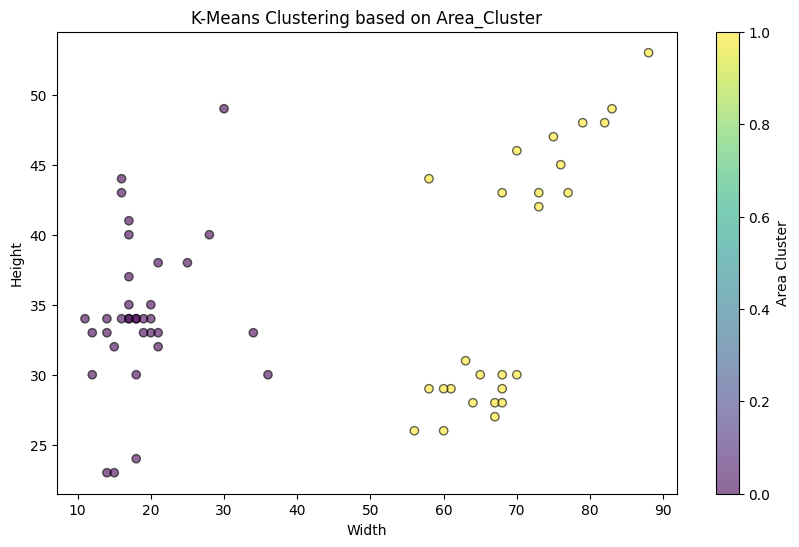

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for Width and Height colored by Area_Cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_dropped_by_name['Width'], df_dropped_by_name['Height'], 
            c=df_dropped_by_name['Area_Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('K-Means Clustering based on Area_Cluster')
plt.colorbar(label='Area Cluster')
plt.show()

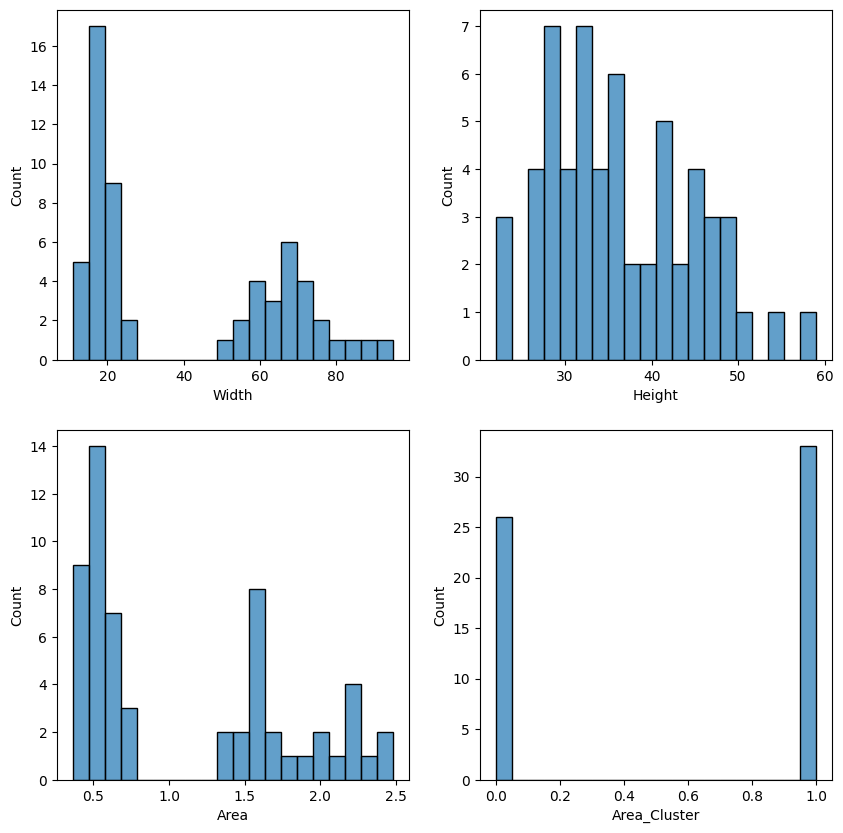

In [10]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(df_dropped_by_name['Width'],bins=20, alpha=0.7, ax=axes[0, 0])
sns.histplot(df_dropped_by_name['Height'],bins=20, alpha=0.7, ax=axes[0, 1])
sns.histplot(df_dropped_by_name['Area'],bins=20,  alpha=0.7, ax=axes[1, 0])
#sns.histplot(df_dropped_by_name['Scaled_Area'],bins=20,  alpha=0.7, ax=axes[1, 1])
sns.histplot(df_dropped_by_name['Area_Cluster'],bins=20, alpha=0.7, ax=axes[1, 1])
plt.show()

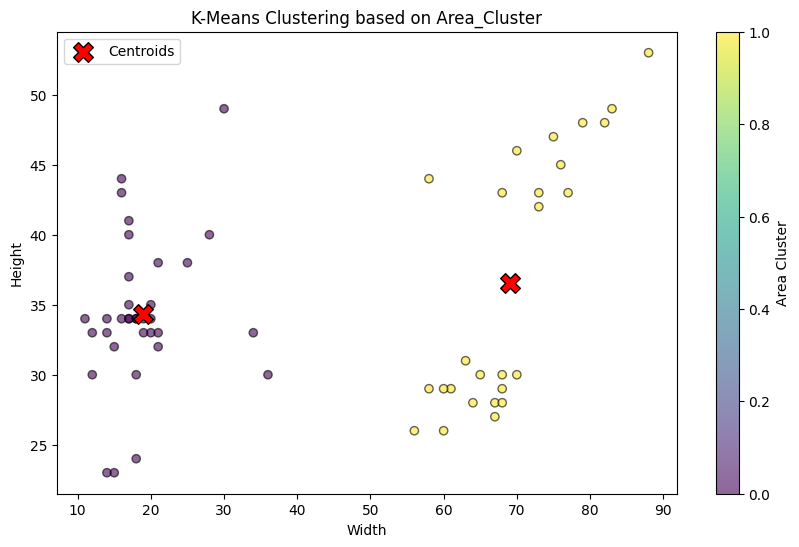

[[18.91176471 34.35294118]
 [69.11538462 36.57692308]]


In [24]:
# Assuming df_dropped_by_name is already defined and has columns 'Width', 'Height', and 'Area_Cluster'

# Assuming kmeans_area is the KMeans object used to perform clustering
kmeans_area = KMeans(n_clusters=2)  # Or the number of clusters you used
kmeans_area.fit(df_dropped_by_name[['Width', 'Height']])

# Get the centroids
centroids = kmeans_area.cluster_centers_

# Scatter plot for Width and Height colored by Area_Cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_dropped_by_name['Width'], df_dropped_by_name['Height'], 
                      c=df_dropped_by_name['Area_Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', edgecolor='k', 
            marker='X', s=200, label='Centroids')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('K-Means Clustering based on Area_Cluster')
plt.colorbar(scatter, label='Area Cluster')
plt.legend()
plt.show()
print(centroids)

In [25]:
'''
# Sample data creation for demonstration (remove this part in actual use)
# Replace this with your actual DataFrame
# df_dropped_by_name = pd.DataFrame({
#     'Width': np.random.rand(100) * 100,
#     'Height': np.random.rand(100) * 100
# })


# Calculate the centroids of the clusters in the original feature space
centroids = kmeans_area.cluster_centers_

# To map the centroids back to the original scale for plotting, we need to apply the inverse of the scaling:
# First, inverse transform the centroids
# The centroids are in the scaled area space, we need to transform them back to the area space

# Scale back centroids from Scaled Area to original Area
centroids_original = scaler.inverse_transform(centroids)

# Get the average Width and Height for each cluster to represent centroids
centroids_x = []
centroids_y = []
for i in range(2):  # Loop through clusters
    cluster_data = df_dropped_by_name[df_dropped_by_name['Area_Cluster'] == i]
    centroids_x.append(cluster_data['Width'].mean())  # Average Width for the cluster
    centroids_y.append(cluster_data['Height'].mean())  # Average Height for the cluster

# Plotting

plt.figure(figsize=(10, 6))
# Scatter plot for Width and Height colored by Area_Cluster
plt.scatter(df_dropped_by_name['Width'], df_dropped_by_name['Height'], 
            c=df_dropped_by_name['Area_Cluster'], cmap='viridis', alpha=0.6, edgecolor='k', label='Data Points')

# Plot centroids in red
plt.scatter(centroids_x, centroids_y, c='red', s=200, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('K-Means Clustering: Height vs. Width with Centroids')
plt.legend()
plt.colorbar(label='Area Cluster')
plt.show()
'''

"\n# Sample data creation for demonstration (remove this part in actual use)\n# Replace this with your actual DataFrame\n# df_dropped_by_name = pd.DataFrame({\n#     'Width': np.random.rand(100) * 100,\n#     'Height': np.random.rand(100) * 100\n# })\n\n\n# Calculate the centroids of the clusters in the original feature space\ncentroids = kmeans_area.cluster_centers_\n\n# To map the centroids back to the original scale for plotting, we need to apply the inverse of the scaling:\n# First, inverse transform the centroids\n# The centroids are in the scaled area space, we need to transform them back to the area space\n\n# Scale back centroids from Scaled Area to original Area\ncentroids_original = scaler.inverse_transform(centroids)\n\n# Get the average Width and Height for each cluster to represent centroids\ncentroids_x = []\ncentroids_y = []\nfor i in range(2):  # Loop through clusters\n    cluster_data = df_dropped_by_name[df_dropped_by_name['Area_Cluster'] == i]\n    centroids_x.append

### correct prediction for one frame (frame 61.bmp)

In [26]:
# Assuming kmeans_area is the KMeans object used to perform clustering
# If you haven't already created and fitted the KMeans model, you would do it like this:
# kmeans_area = KMeans(n_clusters=2)  # Or the number of clusters you used
# kmeans_area.fit(df_dropped_by_name[['Width', 'Height']])

# Define the function to process and predict the cluster for a new frame
def process_and_predict_frame(frame_name, x, y, width, height, kmeans_model, frame_folder):
    # Load the image
    frame_path = os.path.join(frame_folder, frame_name)
    frame = cv2.imread(frame_path)
    print(frame_path)
    # Check if the frame was loaded successfully
    if frame is None:
        print(f"Error: Could not load image {frame_name}")
        return

    # Prepare the feature vector for prediction
    features = np.array([[width, height]])
    
    # Predict the cluster
    cluster = kmeans_model.predict(features)[0]

    # Set the rectangle color based on the predicted cluster
    if cluster == 0:
        color = (0, 0, 255)  # Red for cluster 0
    else:
        color = (0, 255, 0)  # Green for cluster 1

    # Draw the rectangle
    cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)

    # Display the frame
    cv2.imshow(f'Frame: {frame_name}', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
frame_folder = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10'
frame_name = 'frame_61.bmp'  # Replace with your frame name
x_cordinate = 159  # Replace with your x-coordinate
y_cordinate = 211  # Replace with your y-coordinate
width = 24  # Replace with your width
height = 47  # Replace with your height

# Call the function with the new frame's features
process_and_predict_frame(frame_name, x_cordinate, y_cordinate, width, height, kmeans_area, frame_folder)


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_61.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### correct prediction of 9 frames in a single window 

In [16]:


# Define the function to process and predict the cluster for a new frame
def process_and_predict_frame(frame_name, x, y, width, height, kmeans_model, frame_folder):
    # Load the image
    frame_path = os.path.join(frame_folder, frame_name)
    frame = cv2.imread(frame_path)
    print(frame_path)
    # Check if the frame was loaded successfully
    if frame is None:
        print(f"Error: Could not load image {frame_name}")
        return None

    # Prepare the feature vector for prediction
    features = np.array([[width, height]])
    
    # Predict the cluster
    cluster = kmeans_model.predict(features)[0]

    # Set the rectangle color based on the predicted cluster
    if cluster == 0:
        color = (0, 0, 255)  # Red for cluster 0
    else:
        color = (0, 255, 0)  # Green for cluster 1

    # Draw the rectangle
    cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)

    return frame

# Test data
test_data = [
    ['frame_61.bmp', 159, 211, 24, 47],
    ['frame_62.bmp', 306, 74, 18, 33],
    ['frame_63.bmp', 273, 72, 19, 33],
    ['frame_64.bmp', 90, 183, 26, 43],
    ['frame_66.bmp', 222, 76, 20, 42],
    ['frame_67.bmp', 89, 119, 75, 50],
    ['frame_68.bmp', 201, 150, 93, 64],
    ['frame_69.bmp', 124, 215, 22, 45],
    ['frame_70.bmp', 28, 142, 18, 41]
]

# Folder where your test frames are stored
frame_folder = r'C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10'

# Process each frame in the test data
for frame_data in test_data:
    frame_name, x_cordinate, y_cordinate, width, height = frame_data
    frame = process_and_predict_frame(frame_name, x_cordinate, y_cordinate, width, height, kmeans_area, frame_folder)
    
    if frame is not None:
        cv2.imshow('Frame', frame)
        cv2.waitKey(600)  # Display each frame for 600 ms

cv2.destroyAllWindows()

C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_61.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_62.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_63.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_64.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_66.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_67.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_68.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_69.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


C:\Users\zain\Downloads\AI_Najeed\haar-Feb_2019\temp\test_data10\frame_70.bmp


c:\users\zain\my_tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


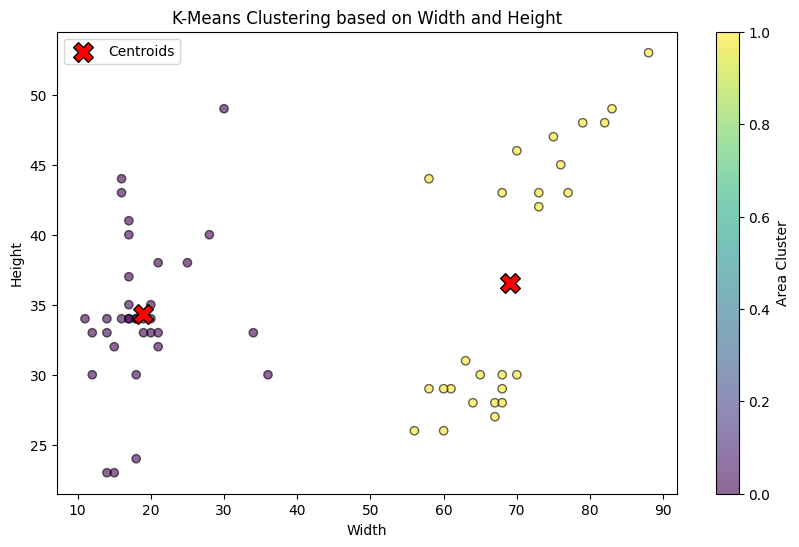

[[18.91176471 34.35294118]
 [69.11538462 36.57692308]]


In [17]:
# Plotting the clusters and centroids based on Width and Height
centroids = kmeans_area.cluster_centers_

# Scatter plot for Width and Height colored by Area_Cluster
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_dropped_by_name['Width'], df_dropped_by_name['Height'], 
                      c=df_dropped_by_name['Area_Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', edgecolor='k', 
            marker='X', s=200, label='Centroids')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('K-Means Clustering based on Width and Height')
plt.colorbar(scatter, label='Area Cluster')
plt.legend()
plt.show()

print(centroids)
